In [1]:
import pandas as pd
import pyxlsb as pxl
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/healthcare-dataset-stroke-data.csv')

Análise Exploratória

In [3]:
df.head()

# Boleanos: hypertension, heart_disease, stroke, ever_married (Yes/No), stroke
# String: gender, work_type, residence_type, smoking_status
# Float: avg_glucose_level, bmi

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()
# A variável BMI possui 201 valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
# Análise das variáveis String
# String: gender, work_type, residence_type, smoking_status

print(df['gender'].value_counts(normalize=True)*100,'\n')
print(df['work_type'].value_counts(normalize=True)*100,'\n')
print(df['Residence_type'].value_counts(normalize=True)*100,'\n')
print(df['smoking_status'].value_counts(normalize=True)*100,'\n')

# genero está levemente desbalanceado


gender
Female    58.590998
Male      41.389432
Other      0.019569
Name: proportion, dtype: float64 

work_type
Private          57.240705
Self-employed    16.027397
children         13.444227
Govt_job         12.857143
Never_worked      0.430528
Name: proportion, dtype: float64 

Residence_type
Urban    50.802348
Rural    49.197652
Name: proportion, dtype: float64 

smoking_status
never smoked       37.025440
Unknown            30.215264
formerly smoked    17.318982
smokes             15.440313
Name: proportion, dtype: float64 



In [6]:
df[['age','avg_glucose_level','bmi']].describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


([<matplotlib.axis.XTick at 0x234425a74c0>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

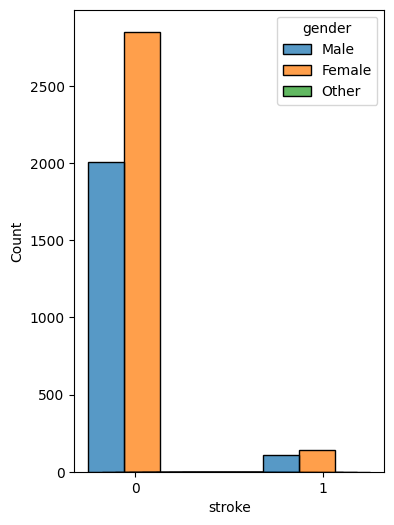

In [7]:
plt.figure(figsize=(4,6))
sns.histplot(data=df, x='stroke', hue='gender',multiple="dodge", shrink=8)
plt.xticks([0,1])

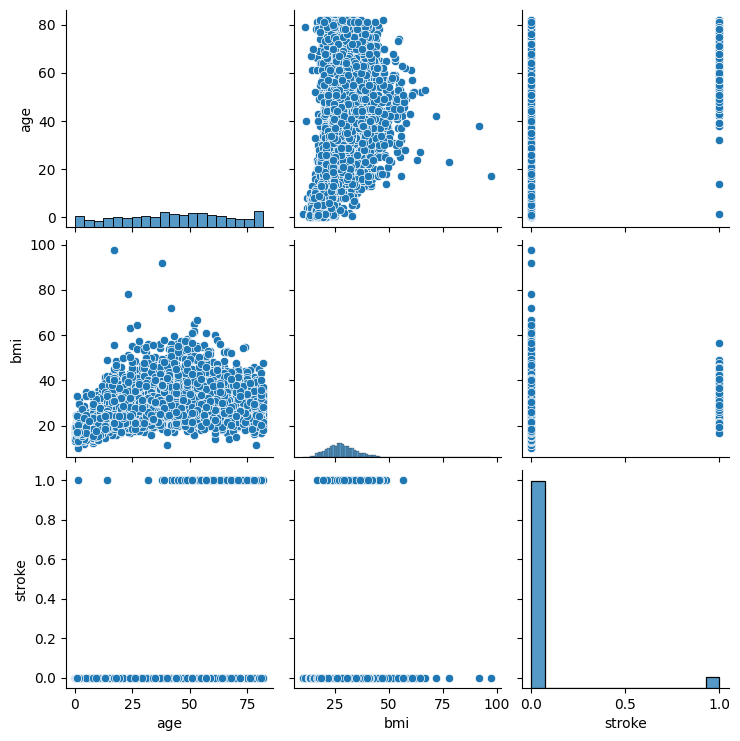

In [8]:
df_selecionado = df[['age', 'bmi', 'stroke']]
sns.pairplot(df_selecionado)

# é possível observar nessas variáiveis que as pessoas com mais chances de ter um AVC são
    # pessoas > 35 anos
    # pessoas com IMC acima do saudável

([<matplotlib.axis.XTick at 0x23444f37160>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

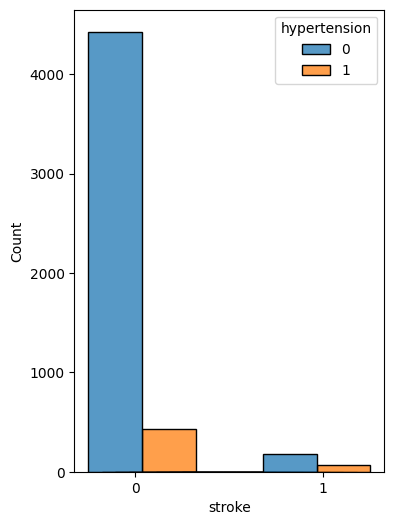

In [9]:
# 'hypertension', 'heart_disease',
plt.figure(figsize=(4,6))
sns.histplot(data=df, x='stroke', hue='hypertension',multiple="dodge", shrink=8)
plt.xticks([0,1])

([<matplotlib.axis.XTick at 0x23444ff4190>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

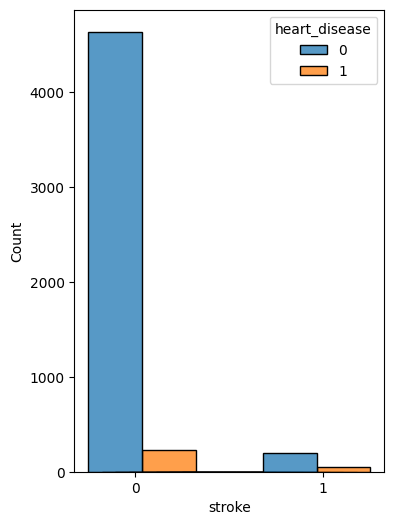

In [10]:
plt.figure(figsize=(4,6))
sns.histplot(data=df, x='stroke', hue='heart_disease',multiple="dodge", shrink=8)
plt.xticks([0,1])

([<matplotlib.axis.XTick at 0x234462a12a0>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

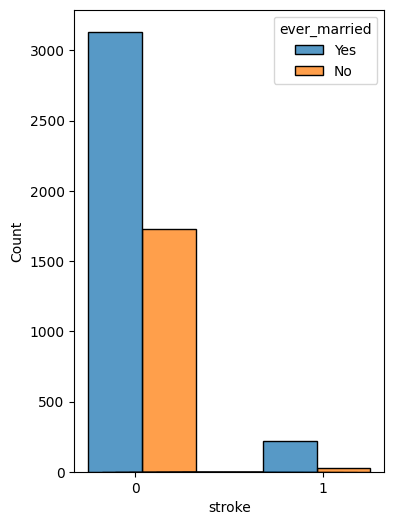

In [11]:
plt.figure(figsize=(4,6))
sns.histplot(data=df, x='stroke', hue='ever_married',multiple="dodge", shrink=8)
plt.xticks([0,1])

In [12]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

([<matplotlib.axis.XTick at 0x2344627fd30>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

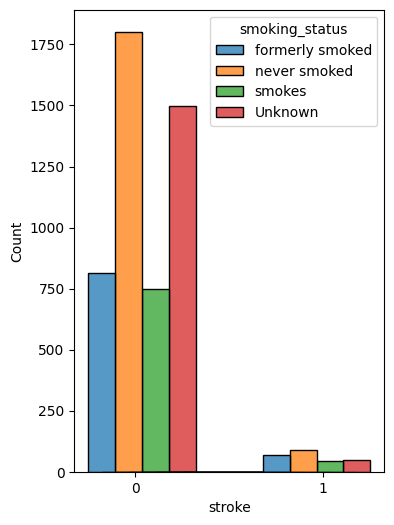

In [13]:
plt.figure(figsize=(4,6))
sns.histplot(data=df, x='stroke', hue='smoking_status',multiple="dodge", shrink=8)
plt.xticks([0,1])

([<matplotlib.axis.XTick at 0x23446459060>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

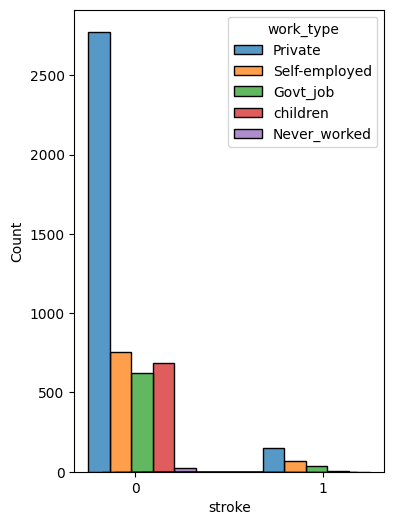

In [14]:
plt.figure(figsize=(4,6))
sns.histplot(data=df, x='stroke', hue='work_type',multiple="dodge", shrink=8)
plt.xticks([0,1])

([<matplotlib.axis.XTick at 0x23446562290>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

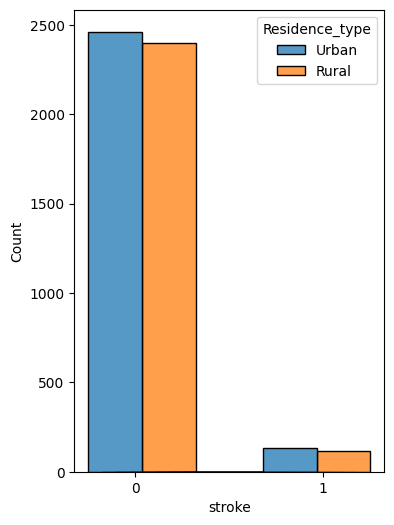

In [15]:
plt.figure(figsize=(4,6))
sns.histplot(data=df, x='stroke', hue='Residence_type',multiple="dodge", shrink=8)
plt.xticks([0,1])

Tratamento de Dados

In [16]:
colunasString = df.select_dtypes(include='object').columns.values
colunasString

array(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'], dtype=object)

In [17]:
df = pd.concat([df.drop(colunasString, axis=1),
                      pd.get_dummies(df[colunasString], prefix=colunasString)], axis=1)

df.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke', 'gender_Female', 'gender_Male', 'gender_Other',
       'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [18]:
df.fillna(df.mean(numeric_only=True), inplace=True)

Criando dados de teste e treinamento

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_error, mean_squared_error, confusion_matrix, classification_report

In [20]:
X = df.drop('stroke', axis=1)
y = df['stroke']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=13)

In [22]:
modelo = LogisticRegression()

In [23]:
modelo.fit(X_train, y_train)

LogisticRegression()

In [24]:
y_pred = modelo.predict(X_test)

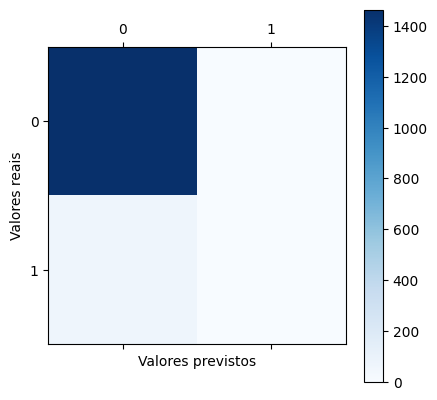

In [28]:
# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Traçar a matriz de confusão
plt.matshow(cm, cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel('Valores previstos')
plt.ylabel('Valores reais')
plt.show()

In [32]:
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9556    1.0000    0.9773      1465
           1     0.0000    0.0000    0.0000        68

    accuracy                         0.9556      1533
   macro avg     0.4778    0.5000    0.4887      1533
weighted avg     0.9133    0.9556    0.9340      1533



c:\Users\larys\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\larys\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\larys\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [25]:
import numpy as np

In [26]:
r2 = r2_score(y_test, y_pred)
# medida de diferença absoluta entre os valores reais e os previstos; quanto menor, melhor a performance
mae = mean_absolute_error(y_test, y_pred)
# medida dos quadrados das diferenças entre os valores reais e os previstos
mse = mean_squared_error(y_test, y_pred)
# raiz do MSE, representa a magnitude média do erro; quanto menor melhor a performance
rmse = np.sqrt(mse)

print("R²: {:.3f}".format(r2))
print("MAE: {:.3f}".format(mae))
print("MSE: {:.3f}".format(mse))
print("RMSE: {:.3f}".format(rmse))

R²: -0.046
MAE: 0.044
MSE: 0.044
RMSE: 0.211


In [34]:
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler

In [44]:
y_train.value_counts()

stroke
0    3396
1     181
Name: count, dtype: int64

In [46]:
ros = RandomOverSampler(random_state=123)

X_oversample, y_oversample = ros.fit_resample(X_train, y_train)

print(y_oversample.value_counts())

149424
stroke
0    3396
1    3396
Name: count, dtype: int64
